   k            x1     x2  beta  discrepancy
0  0 -1.654810e-07  0.000     1     0.353553
1  1 -1.391400e-14  1.000     1     0.088388
2  2  1.928660e-17  1.500     1     0.022097
3  3  1.928660e-17  1.750     1     0.005524
4  4  1.928660e-17  1.875     1     0.001381


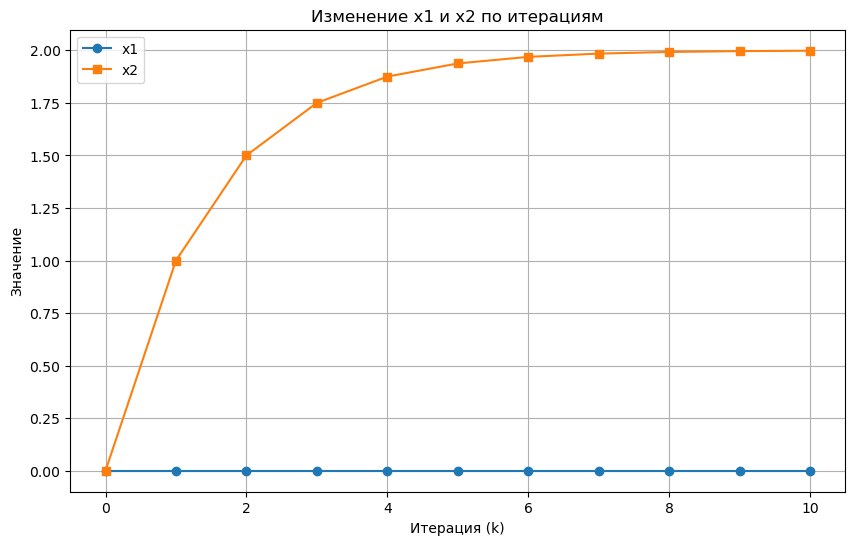

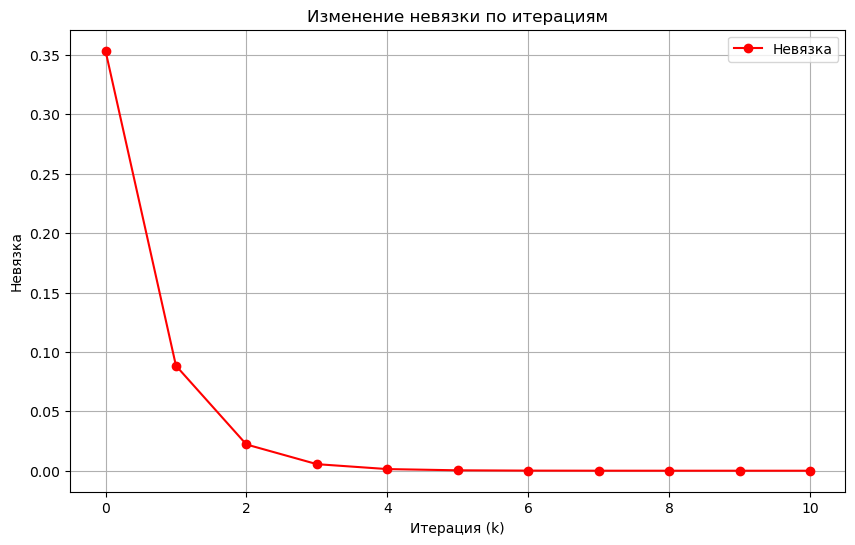

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Считываем данные из файла
data = pd.read_csv('iterations.txt')

# Выводим первые несколько строк данных для проверки
print(data.head())

# Построение графика изменения x1 и x2 по итерациям
plt.figure(figsize=(10, 6))
plt.plot(data['k'], data['x1'], label='x1', marker='o')
plt.plot(data['k'], data['x2'], label='x2', marker='s')
plt.xlabel('Итерация (k)')
plt.ylabel('Значение')
plt.title('Изменение x1 и x2 по итерациям')
plt.legend()
plt.grid(True)
plt.show()

# Построение графика изменения невязки по итерациям
plt.figure(figsize=(10, 6))
plt.plot(data['k'], data['discrepancy'], label='Невязка', marker='o', color='red')
plt.xlabel('Итерация (k)')
plt.ylabel('Невязка')
plt.title('Изменение невязки по итерациям')
plt.legend()
plt.grid(True)
plt.show()

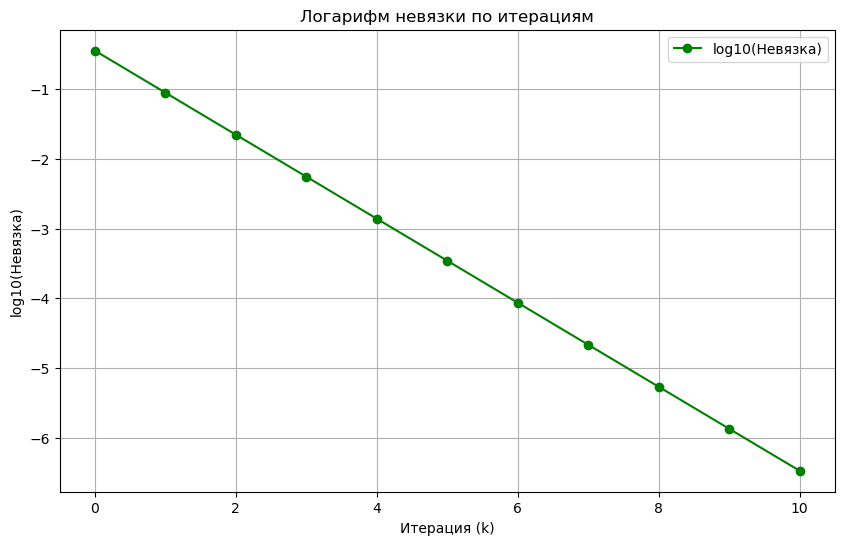

In [2]:
import numpy as np

# Построение графика логарифма невязки
plt.figure(figsize=(10, 6))
plt.plot(data['k'], np.log10(data['discrepancy']), label='log10(Невязка)', marker='o', color='green')
plt.xlabel('Итерация (k)')
plt.ylabel('log10(Невязка)')
plt.title('Логарифм невязки по итерациям')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
import pandas as pd

# Создаем DataFrame с данными
data = {
    'k': [1, 2, 3, 4, 5, 6],
    'x1': [0.000000e+00, 2.846735e-02, 1.268474e-02, 3.772751e-03, 2.031960e-04, 3.556308e-08],
    'x2': [6.060606e-02, 1.060577e+00, 1.586930e+00, 1.879151e+00, 1.993491e+00, 1.999999e+00],
    'β': [1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00],
    'Невязка': [3.432931e-01, 9.425206e-02, 2.868444e-02, 7.323840e-03, 3.866403e-04, 6.801623e-08]
}

df = pd.DataFrame(data)

# Форматируем таблицу
styled_df = df.style.format({
    'x1': '{:.6e}',
    'x2': '{:.6e}',
    'β': '{:.6e}',
    'Невязка': '{:.6e}'
}).set_caption("Начальное приближение (-2, 0): Симметризация")

# Отображаем таблицу
styled_df

,k,x1,x2,β,Невязка
0,1,0.000000e+00,6.060606e-02,1.000000e+00,3.432931e-01
1,2,2.846735e-02,1.060577e+00,1.000000e+00,9.425206e-02
2,3,1.268474e-02,1.586930e+00,1.000000e+00,2.868444e-02
3,4,3.772751e-03,1.879151e+00,1.000000e+00,7.323840e-03
4,5,2.031960e-04,1.993491e+00,1.000000e+00,3.866403e-04
5,6,3.556308e-08,1.999999e+00,1.000000e+00,6.801623e-08


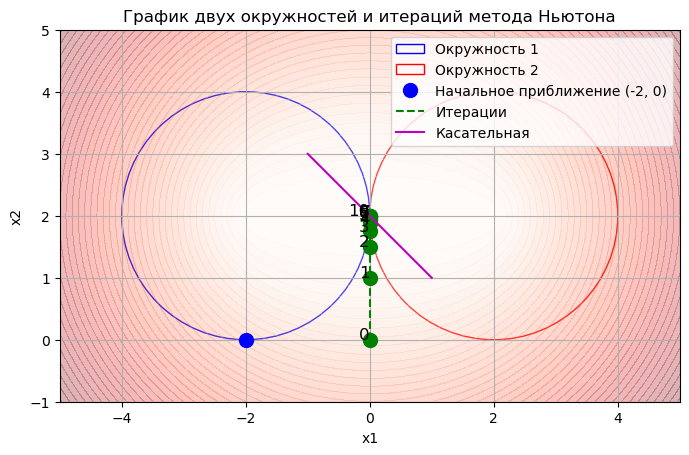

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Чтение данных из файла input.txt
df = pd.read_csv('iterations.txt')

# Параметры окружностей
circle1_center = (-2, 2)
circle1_radius = 2

circle2_center = (2, 2)
circle2_radius = 2

# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(8, 8))

# Рисуем первую окружность
circle1 = plt.Circle(circle1_center, circle1_radius, color='blue', fill=False, label='Окружность 1')
ax.add_patch(circle1)

# Рисуем вторую окружность
circle2 = plt.Circle(circle2_center, circle2_radius, color='red', fill=False, label='Окружность 2')
ax.add_patch(circle2)

# Настройка осей
ax.set_xlim(-5, 5)
ax.set_ylim(-1, 5)
ax.set_aspect('equal', 'box')  # Чтобы оси были одинакового масштаба

# Добавляем сетку и легенду
ax.grid(True)
ax.legend()

# Добавляем подписи осей
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('График двух окружностей и итераций метода Ньютона')

# Начальное приближение
ax.plot(-2, 0, 'bo', markersize=10, label='Начальное приближение (-2, 0)')

# Рисуем итерации
for i, row in df.iterrows():
    ax.plot(row['x1'], row['x2'], 'go', markersize=10)
    ax.text(row['x1'], row['x2'], f'{i}', fontsize=12, ha='right')

# Рисуем линии, соединяющие точки итераций
x1_values = df['x1'].tolist()
x2_values = df['x2'].tolist()
ax.plot(x1_values, x2_values, 'g--', label='Итерации')

# Возмущение красного цвета на фоне (пример)
x = np.linspace(-5, 5, 400)
y = np.linspace(-1, 5, 400)
X, Y = np.meshgrid(x, y)
Z = np.sqrt((X + 2)**2 + (Y - 2)**2) + np.sqrt((X - 2)**2 + (Y - 2)**2)
ax.contourf(X, Y, Z, levels=50, cmap='Reds', alpha=0.3)

# Касательная к последней точке
last_x1 = df['x1'].iloc[-1]
last_x2 = df['x2'].iloc[-1]
tangent_slope = -1  # Пример наклона касательной
tangent_x = np.linspace(last_x1 - 1, last_x1 + 1, 100)
tangent_y = tangent_slope * (tangent_x - last_x1) + last_x2
ax.plot(tangent_x, tangent_y, 'm-', label='Касательная')

# Обновляем легенду
ax.legend()

# Отображаем график
plt.show()

   k            x1     x2  beta  discrepancy
0  0 -1.654810e-07  0.000     1     0.353553
1  1 -1.391400e-14  1.000     1     0.088388
2  2  1.928660e-17  1.500     1     0.022097
3  3  1.928660e-17  1.750     1     0.005524
4  4  1.928660e-17  1.875     1     0.001381


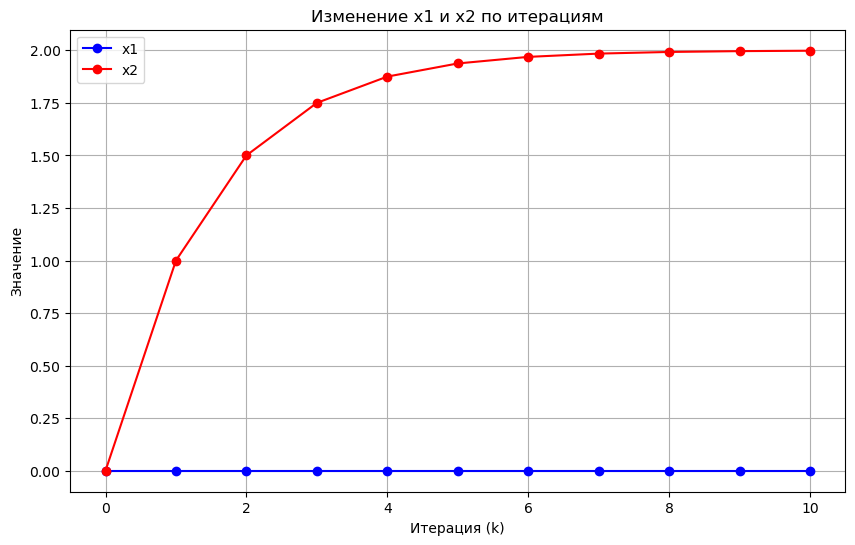

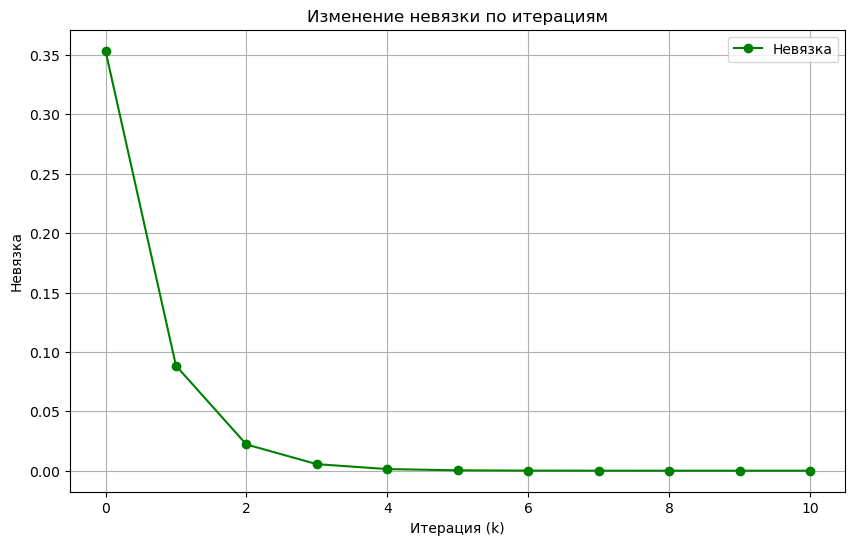

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Чтение данных из файла
df = pd.read_csv('iterations.txt')

# Вывод первых строк данных для проверки
print(df.head())

# Построение графика изменения x1 и x2 по итерациям
plt.figure(figsize=(10, 6))
plt.plot(df['k'], df['x1'], 'bo-', label='x1')
plt.plot(df['k'], df['x2'], 'ro-', label='x2')
plt.xlabel('Итерация (k)')
plt.ylabel('Значение')
plt.title('Изменение x1 и x2 по итерациям')
plt.legend()
plt.grid(True)
plt.show()

# Построение графика изменения невязки по итерациям
plt.figure(figsize=(10, 6))
plt.plot(df['k'], df['discrepancy'], 'go-', label='Невязка')
plt.xlabel('Итерация (k)')
plt.ylabel('Невязка')
plt.title('Изменение невязки по итерациям')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_43643/1522276647.py:6: RuntimeWarning: invalid value encountered in sqrt
  return 2 - np.sqrt(4 - (x + 2)**2)  # Верхняя полуокружность для первой окружности
/tmp/ipykernel_43643/1522276647.py:9: RuntimeWarning: invalid value encountered in sqrt
  return 2 - np.sqrt(4 - (x - 2)**2)  # Верхняя полуокружность для второй окружности


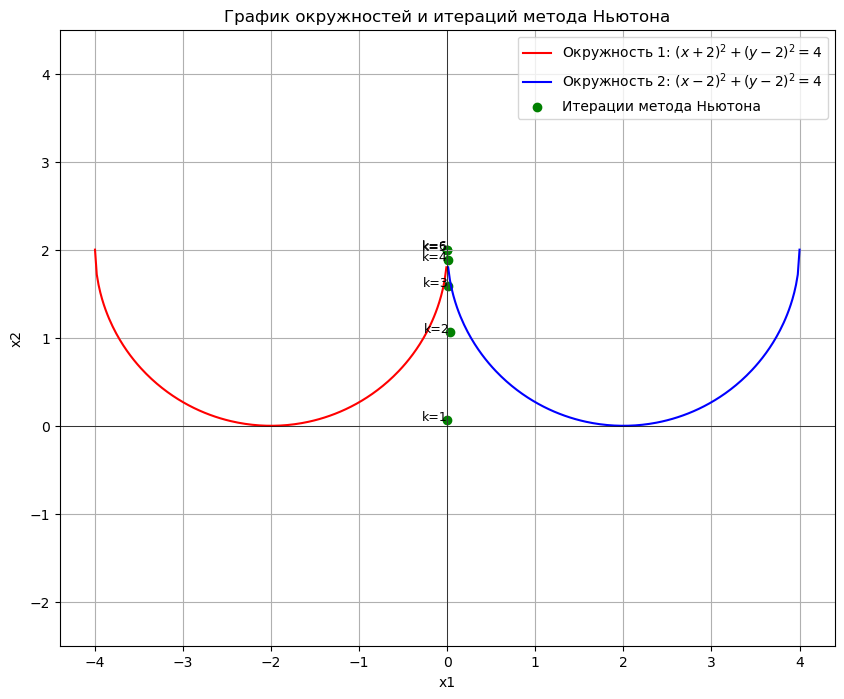

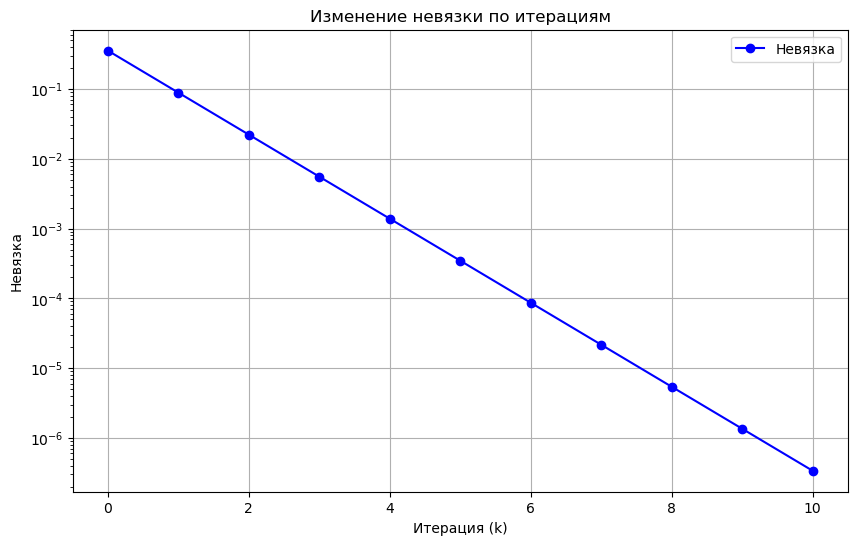

In [19]:
import matplotlib.pyplot as plt

# Данные из iterations.txt
iterations = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
discrepancy = [0.353553, 0.0883884, 0.0220971, 0.00552427, 0.00138107, 0.000345279, 8.63198e-05, 2.158e-05, 5.39652e-06, 1.3499e-06, 3.37474e-07]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(iterations, discrepancy, marker='o', linestyle='-', color='b', label='Невязка')
plt.xlabel('Итерация (k)')
plt.ylabel('Невязка')
plt.title('Изменение невязки по итерациям')
plt.yscale('log')  # Логарифмическая шкала для оси Y
plt.grid(True)
plt.legend()
plt.show()

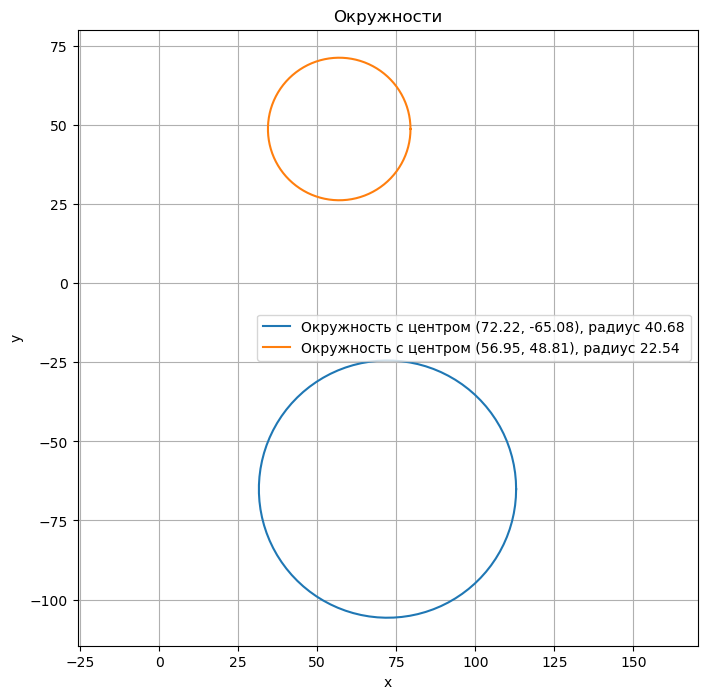

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры окружностей (пример)
centers = [(72.22, -65.08), (56.95, 48.81)]  # Центры окружностей
radii = [40.68, 22.54]  # Радиусы окружностей

# Построение окружностей
plt.figure(figsize=(8, 8))
for (x0, y0), r in zip(centers, radii):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = x0 + r * np.cos(theta)
    y = y0 + r * np.sin(theta)
    plt.plot(x, y, label=f'Окружность с центром ({x0}, {y0}), радиус {r}')

# Настройка графика
plt.xlabel('x')
plt.ylabel('y')
plt.title('Окружности')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()